** **Statement of problem****





You are a data scientist for a campaign organisation. Your assignment on this project is to conduct text mining on political rally dataset and find positive and negative sentiments in the speeches. Develop an ML model that can be used to detect and classify future political speeches into positive or negative sentiments, as the identification of sentiments is important so as to prevent against negative campaigning. Future speeches will be run through the developed model to determine the number of positives and negative sentiments, and to determine the overall sentiment of the speech. 


In [1]:
#importing and downloading nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [2]:
#reading the overall speech data. All the speech data was merged into the "projectdata.txt" document
data=open("projectdata.txt").read()
data

'Thank you. Thank you. Thank you to Vice President Pence. He\'s a good guy. We\'ve done a great job together. And Merry Christmas, Michigan. Thank you, Michigan. What a victory we had in Michigan. What a victory was that. One of the greats. Was that the greatest evening? But I\'m thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God. Thank you very much. And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas. I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky. I took you on this fantastic journey. It\'s so much fun. They want to impeach you. They want to do worse than that." By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached. The country is doing better than ever before. We did nothing wrong. We did nothing wrong. And we have tremendo

In [3]:
#loading the data into a corpus and reading it. corpus gives us the opportunity to explore the raw text data in more details
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import os
corpus = PlaintextCorpusReader(os.getcwd(), "projectdata.txt")
print (corpus.raw())


Thank you. Thank you. Thank you to Vice President Pence. He's a good guy. We've done a great job together. And Merry Christmas, Michigan. Thank you, Michigan. What a victory we had in Michigan. What a victory was that. One of the greats. Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God. Thank you very much. And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas. I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky. I took you on this fantastic journey. It's so much fun. They want to impeach you. They want to do worse than that." By the way, by the way, by the way, it doesn't really feel like we're being impeached. The country is doing better than ever before. We did nothing wrong. We did nothing wrong. And we have tremendous supp

In [4]:
sentences=corpus.sents()
print(len(sentences))

36789


In [5]:
word_indata= corpus.words()
print(len(word_indata))

471093


Word clouds


This a visual display of words in a corpus. The size of the words is based on how many times the word occured in the corpus. The more frequent the bigger it is in the word cloud. In creating the word clouds, stopwords will be removed, because we do not want the wordclouds flooded with stopwords.

In [6]:
#printing word clouds. setting stopwords to the standard.
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set (STOPWORDS)

#creating the wordclouds and passing in the data
wordcloud=WordCloud(stopwords=stopwords, max_words=100, \
                    background_color="white").generate(data)

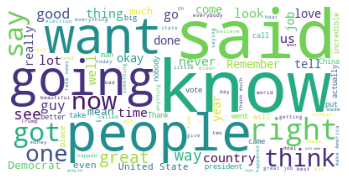

In [7]:
#displaying the wordcloud using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Sentiment Analysis**


The next stage is to identify sentiments in the data. This will be done by categorizing intent or opinion in the text data. The method that will be used here is the bag of words technique. Bag of words finds specific words in the data and use these words to determine centiments. Polarity will be used to determine the centiments. It considers whether the words are positive, negative or neutral. Polarity ranges from +1 (positive) to -1(negative), with neutral being 0. It also identifies subjectiveness of sentiments, based on how it is used. objective is 0 while subjective is 1.  The package that we would be using is textblob. Textblob allows us to perform sentiment analysis on the data. 

In [8]:
!pip install textblob
from textblob import TextBlob

In [9]:
#getting the overall sentiments of the  all the speech data for all location
sentanaly=TextBlob(data)
print (sentanaly.sentiment)


Sentiment(polarity=0.16889071726816188, subjectivity=0.5195487375227866)


**Preparing data for individual sentence sentiment analysis**


Based on the sentiment output above, it is evident that python currently, python sees the data as a single string, which is why we got a sentiment score for the overall data. Keeping in mind that the objective of this project is to develop a machine learning (ML) model, it is important that we are able to determine the sentiments for each individual sentences. Therefore, we will now proceed to split the data into individual sentences. This will lead to another challenge because the sentiment analysis tool (textblob) that will be used cannot work with list, it only works with string. To solve this problem, the output data will be saved into a text file, which will then be read and used to find sentiments in each of the sentences. 

In [10]:
#before we go on to find sentiment in the data. we need to structure the data and turn it to a list of sentences. 
newdata= data.split('.')
newdata

['Thank you',
 ' Thank you',
 ' Thank you to Vice President Pence',
 " He's a good guy",
 " We've done a great job together",
 ' And Merry Christmas, Michigan',
 ' Thank you, Michigan',
 ' What a victory we had in Michigan',
 ' What a victory was that',
 ' One of the greats',
 " Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God",
 ' Thank you very much',
 ' And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas',
 ' I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky',
 ' I took you on this fantastic journey',
 " It's so much fun",
 ' They want to impeach you',
 ' They want to do worse than that',
 '" By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached',
 ' The country is doing better than ever

In [11]:
#saving the listed sentences to a file
outF = open("myOutFile.txt", "w")
for line in newdata:
  # write line to output file
  outF.write(line)
  outF.write("\n")
outF.close()
outF

<_io.TextIOWrapper name='myOutFile.txt' mode='w' encoding='UTF-8'>

In [12]:
#textblobing the overall combined data
datasent=TextBlob(data)

In [13]:
#splitting the overall data into individual sentences and fitting it in a dataframe
import pandas as pd
p = []
for s in datasent.sentences:
   p.append(str(s))
ddf=pd.DataFrame(data=p, columns=["Sentences"])
ddf.head()

Sentences
0                          Thank you.
1                          Thank you.
2  Thank you to Vice President Pence.
3                    He's a good guy.
4    We've done a great job together.

In [14]:
#getting the sentiments for the individual sentences and fitting it in a dataframe
def data_polarity(d_sentiment):
  for d in datasent.sentences:
    if d==d_sentiment: return float(d.polarity)
def data_classify(val):
  if val==0: return 0
  if val>0: return 1
  if val<0: return -1
ddf['polarity_float']=ddf['Sentences'].apply(lambda x:data_polarity(x))
ddf['polarity_int']=ddf['polarity_float'].apply(lambda x:data_classify(x))
ddf

Sentences  polarity_float  polarity_int
0                              Thank you.             0.0             0
1                              Thank you.             0.0             0
2      Thank you to Vice President Pence.             0.0             0
3                        He's a good guy.             0.7             1
4        We've done a great job together.             0.8             1
...                                   ...             ...           ...
36784                Governor, thank you.             0.0             0
36785             Martha, go out and win.             0.8             1
36786                     Go out and win.             0.8             1
36787                       Vote McSally.             0.0             0
36788                Thank you everybody.             0.0             0

[36789 rows x 3 columns]

Final summarized counts : [21069, 7079, 4889]

 Pie Representation 
-------------------


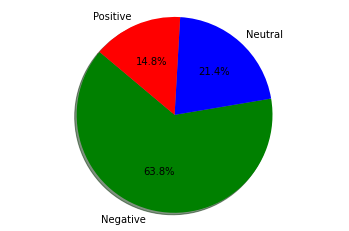

In [15]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each sentence
for lines in newdata:
    sentiment1 = TextBlob(lines)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment1.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [16]:
import pandas as pd


**Location Analysis**

The next step is to conduct the sentiment analysis for each individual location speech. 

In [17]:
#reading in individual speech data
batdata=open("BattleCreekDec19_2019.txt").read()
bemdata=open("BemidjiSep18_2020.txt").read()
cha1data=open("CharlestonFeb28_2020.txt").read()
cha2data=open("CharlotteMar2_2020.txt").read()
cindata=open("CincinnatiAug1_2019.txt").read()
coldata=open("ColoradorSpringsFeb20_2020.txt").read()
daldata=open("DallasOct17_2019.txt").read()
desdata=open("DesMoinesJan30_2020.txt").read()
fay1data=open("FayettevilleSep19_2020.txt").read()
fay2data=open("FayettevilleSep9_2019.txt").read()
freedata=open("FreelandSep10_2020.txt").read()
greendata=open("GreenvilleJul17_2019.txt").read()
hendata=open("HendersonSep13_2020.txt").read()
herdata=open("HersheyDec10_2019.txt").read()
lasdata=open("LasVegasFeb21_2020.txt").read()
latdata=open("LatrobeSep3_2020.txt").read()
lexdata=open("LexingtonNov4_2019.txt").read()
mildata=open("MilwaukeeJan14_2020.txt").read()
minddata=open("MindenSep12_2020.txt").read()
mindata=open("MinneapolisOct10_2019.txt").read()
mosdata=open("MosineeSep17_2020.txt").read()
ndata=open("NewHampshireAug15_2019.txt").read()
nedata=open("NewHampshireAug28_2020.txt").read()
newdata=open("NewMexicoSep16_2019.txt").read()
ohdata=open("OhioSep21_2020.txt").read()
phdata=open("PhoenixFeb19_2020.txt").read()
pitdata=open("PittsburghSep22_2020.txt").read()
texdata=open("TexasSep23_2019.txt").read()
toldata=open("ToledoJan9_2020.txt").read()
tuldata=open("TulsaJun20_2020.txt").read()
tupdata=open("TupeloNov1_2019.txt").read()
wdata=open("WildwoodJan28_2020.txt").read()
widata=open("Winston-SalemSep8_2020.txt").read()
yudata=open("YumaAug18_2020.txt").read()

In [18]:
#finding sentiments for individual location speech, this code prints polarity and subjectivity
BCsent=TextBlob(batdata)
BEsent=TextBlob(bemdata)
CHsent=TextBlob(cha1data)
Csent=TextBlob(cha2data)
CIsent=TextBlob(cindata)
COsent=TextBlob(coldata)
DAsent=TextBlob(daldata)
DEsent=TextBlob(desdata)
FAsent=TextBlob(fay1data)
FAYsent=TextBlob(fay2data)
FRsent=TextBlob(freedata)
GRsent=TextBlob(greendata)
HENsent=TextBlob(hendata)
HERsent=TextBlob(herdata)
LAsent=TextBlob(lasdata)
LATsent=TextBlob(latdata)
LEXsent=TextBlob(lexdata)
MILsent=TextBlob(mildata)
MINsent=TextBlob(minddata)
MIsent=TextBlob(mindata)
MOsent=TextBlob(mosdata)
Nsent=TextBlob(ndata)
NEsent=TextBlob(nedata)
NEWsent=TextBlob(newdata)
OHsent=TextBlob(ohdata)
PHsent=TextBlob(phdata)
PIsent=TextBlob(pitdata)
TEsent=TextBlob(texdata)
TOsent=TextBlob(toldata)
TUsent=TextBlob(tuldata)
TUPsent=TextBlob(tupdata)
Wsent=TextBlob(wdata)
WIsent=TextBlob(widata)
YUsent=TextBlob(yudata)


In [19]:
#fitting the speeches for the individual location in a dataframe and getting their associated sentiments
#Polarity ranges from +1 (positive) to -1(negative), with neutral being 0. subjectiveness of sentiments, based on how it is used. objective is 0 while subjective is 1
import pandas as pd


d={'location': ['BattleCreek', 'Bemidji','Charleston','Charlotte','Cincinnati','Colorador','Dallas','DesMoines','Fayetteville2019','Fayetteville2020','Greenville','Henderson','Hershey','LasVegas','Latrobe','Lexington','Milwaukee','Minden','Minneapolis','Mosinee','NewHapshire2019','NewHapshireAU2020','NewHapshireFEB2020','NewMexico2019','Ohio','Phoenix','Pittsburgh','Texas','Toledo','Tulsa','Tupelo','Wildwood','Winston','Yuma'],'speeches': [batdata, bemdata, cha1data, cha2data, cindata, coldata, daldata, desdata, fay1data,fay2data, freedata, greendata, hendata, herdata, lasdata, latdata, lexdata, mildata, minddata, mindata,mosdata,ndata, nedata, newdata, ohdata, phdata, pitdata, texdata, toldata, tuldata, tupdata, wdata, widata,yudata], 'sentiments': [BCsent.sentiment,BEsent.sentiment,CHsent.sentiment,Csent.sentiment,CIsent.sentiment,COsent.sentiment,DAsent.sentiment,DEsent.sentiment,FAsent.sentiment,FAYsent.sentiment,FRsent.sentiment,GRsent.sentiment,HENsent.sentiment,HERsent.sentiment,LAsent.sentiment,LATsent.sentiment,LEXsent.sentiment,MILsent.sentiment,MINsent.sentiment,MIsent.sentiment,MOsent.sentiment,Nsent.sentiment,NEsent.sentiment,NEWsent.sentiment,OHsent.sentiment,PHsent.sentiment,PIsent.sentiment,TEsent.sentiment,TOsent.sentiment,TUsent.sentiment,TUPsent.sentiment,Wsent.sentiment,WIsent.sentiment,YUsent.sentiment], 'polarity': [BCsent.polarity, BEsent.polarity, CHsent.polarity, Csent.polarity, CIsent.polarity, COsent.polarity, DAsent.polarity,DEsent.polarity, FAsent.polarity, FAYsent.polarity, FRsent.polarity, GRsent.polarity, HENsent.polarity, HERsent.polarity, LAsent.polarity, LATsent.polarity, LEXsent.polarity, MILsent.polarity, MINsent.polarity, MIsent.polarity, MOsent.polarity, Nsent.polarity, NEsent.polarity, NEWsent.polarity, OHsent.polarity, PHsent.polarity, PIsent.polarity, TEsent.polarity, TOsent.polarity, TUsent.polarity, TUPsent.polarity, Wsent.polarity, WIsent.polarity, YUsent.polarity]}
df=pd.DataFrame(data=d)


df.head()

location  ...  polarity
0  BattleCreek  ...  0.164961
1      Bemidji  ...  0.168483
2   Charleston  ...  0.169117
3    Charlotte  ...  0.186697
4   Cincinnati  ...  0.194678

[5 rows x 4 columns]

In [20]:
#saving the dataframe to a file
df.to_csv(index=False)
dffile=df.to_csv(index=False)

**Preparing the data for Machine Learning Model**



Based on the output of the location analysis, I am unable to continue building the model with this formart. The individual location analysis, analyses the sentiments for the overall speech for the individual location. These sentiments come back positive, although with varying degree of positivity. It is unrealistic to train a model based on just one class of data. However, when the speeched are broken down into individual sentences, the sentiment for the individual sentences includes positive, negative and neautral. Therefore, I will continue the model development with the combined data for all location and then split them into individual sentences to get different types of sentiments for the model developmet. 






Since our goal is to do develop a machine learning model for political speeches, we will now preceed to remove stopwords, remove punctuations, tokenize the data, lemmatize and create n grams.

In [21]:
#splitting the data into individual sentences and fitting it into a dataframe
import pandas as pd
l = []
for s in BCsent.sentences:
   l.append(str(s))
d=pd.DataFrame(data=l, columns=["Sentences"])
d.head()

Sentences
0                          Thank you.
1                          Thank you.
2  Thank you to Vice President Pence.
3                    He's a good guy.
4    We've done a great job together.

In [22]:
#conducting sentiment analysis for individual sentences, getting the polarity score and classifying. fittint the output in a dataframe
def BC_polarity(b_sentiment):
  for b in BCsent.sentences:
    if b==b_sentiment: return float(b.polarity)
def BC_classify(val):
  if val==0: return 0
  if val>0: return 1
  if val<0: return -1
d['polarity_float']=d['Sentences'].apply(lambda x:BC_polarity(x))
d['polarity_int']=d['polarity_float'].apply(lambda x:BC_classify(x))
d

Sentences  ...  polarity_int
0                                            Thank you.  ...             0
1                                            Thank you.  ...             0
2                    Thank you to Vice President Pence.  ...             0
3                                      He's a good guy.  ...             1
4                      We've done a great job together.  ...             1
...                                                 ...  ...           ...
1888                  We will make America proud again.  ...             1
1889  We will make America safe again and we will ma...  ...             1
1890                                         Thank you.  ...             0
1891                               Thank you, Michigan.  ...             0
1892                                         Thank you.  ...             0

[1893 rows x 3 columns]

In [23]:
#saving the sentiment analysis dataframe to a file
d.to_csv(index=False)
sentimentdffile=d.to_csv(index=False)

In [24]:
#Removing punctuations from the speech data
import string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

d['Sentences_nopunc'] = d['Sentences'].apply(lambda x: remove_punct(x))

d.head()

Sentences  ...                   Sentences_nopunc
0                          Thank you.  ...                          Thank you
1                          Thank you.  ...                          Thank you
2  Thank you to Vice President Pence.  ...  Thank you to Vice President Pence
3                    He's a good guy.  ...                     Hes a good guy
4    We've done a great job together.  ...     Weve done a great job together

[5 rows x 4 columns]

In [25]:
#tokenize the data 
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

d['Sentences_tokenize'] = d['Sentences_nopunc'].apply(lambda x: tokenize(x.lower()))

d.head()

Sentences  ...                        Sentences_tokenize
0                          Thank you.  ...                              [thank, you]
1                          Thank you.  ...                              [thank, you]
2  Thank you to Vice President Pence.  ...  [thank, you, to, vice, president, pence]
3                    He's a good guy.  ...                       [hes, a, good, guy]
4    We've done a great job together.  ...     [weve, done, a, great, job, together]

[5 rows x 5 columns]

In [26]:
#removing stopwords. To remove stopwords, we need to tell python what stopwords are
import nltk

stopword = nltk.corpus.stopwords.words('english')


def remove_stopwords(Sentences_tokenize):
    text = [word for word in Sentences_tokenize if word not in stopword]
    return text

d['Sentences_nostop'] = d['Sentences_tokenize'].apply(lambda x: remove_stopwords(x))

d.head()

Sentences  ...                    Sentences_nostop
0                          Thank you.  ...                             [thank]
1                          Thank you.  ...                             [thank]
2  Thank you to Vice President Pence.  ...     [thank, vice, president, pence]
3                    He's a good guy.  ...                    [hes, good, guy]
4    We've done a great job together.  ...  [weve, done, great, job, together]

[5 rows x 6 columns]

**Lemmatizing the data.**





The wordnet lemmatizer will be used. It is a very popular lemmatizer. WordNet is a collection of nouns, verbs, adjective and adverbs that are grouped together in sets of synonyms, each expressing a distinct concept. This lemmatizer runs off of this corpus of synonyms, so given a word, it will track that word to its synonyms, and then the distinct concept that that group of words represents.  A similar tool to wordnet lemmatizer is the Porter stemmer. This works by just removing the ending of a word which sometimes is not accurate as it can group words with different meaning together. Its process can also result in getting words that are incomplete or meaningless. 




Wordnet lemmatizer processes words according to their meaning in contest and if there are no similar words in the corpus, it returns the original word, which produces more accurate results, however, it is more time consuming. 




The next stage involves using wordnet lemmatizer to further clean the data. 


In [27]:
#here we conduct a suplementary cleaning to the data by employing the wordnet lemmatizer
wn = nltk.WordNetLemmatizer()

In [28]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

d['Sentences_lemmatized'] = d['Sentences_nostop'].apply(lambda x: lemmatizing(x))

d.head()

Sentences  ...                Sentences_lemmatized
0                          Thank you.  ...                             [thank]
1                          Thank you.  ...                             [thank]
2  Thank you to Vice President Pence.  ...     [thank, vice, president, penny]
3                    He's a good guy.  ...                     [he, good, guy]
4    We've done a great job together.  ...  [weve, done, great, job, together]

[5 rows x 7 columns]

**Vectorizing the data**



The next step is to vectorize the data. Python does not understand words, therefore, we need to convert these words into numbers for Python to understand it. The vectorizing step basically takes the speeches that has been converted to sentences and then turns the individual words in the sentences into a matrix, but then it turns every word used across all documents as the columns of your matrix. And then within each cell is counting how many times that certain word appeared in that document. And this is called your document term matrix. Once the numeric representation has been established, then we go on down the pipeline and fit and train a model.  



**Count vectorization**
Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


**N-Grams**
Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.
N-grams is a sequence of the number of items (n) in a sample of text. The sequence can be made of any number. Depending on N, it's called bigrams, trigrams, four-grams, etc. N-grams are used for building predictive text systems that predict the next sequence of words.






**TfidfVectorizer** 



TfidVectorizer is a document term matrix that put words in a cell that is a weight of how important the word is, by measuring how frequent the word occurs accross the entire document. 



To build the ML model, we would examine all 3 vectorization and chose the best option.




In [29]:
#applying count vectorizer to the dataframe
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer( )
X_counts = count_vect.fit_transform(d['Sentences'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(1893, 2039)
['00', '000', '10', '100', '11', '110', '12', '13', '130', '133', '14', '142', '15', '16', '171', '18', '180', '182', '20', '200', '2016', '2018', '2020', '24', '25', '250', '266', '28', '29', '297', '30', '300', '3000', '32', '35', '36', '3rd', '40', '400', '401k', '401ks', '41', '45', '450', '49', '50', '500', '51', '530', '60', '600', '68', '70', '71', '72', '75', '80', '82', '90', '92', '93', '97', '975', 'able', 'abortion', 'about', 'above', 'abraham', 'absolute', 'abusive', 'accomplishing', 'accord', 'accused', 'accusing', 'achieve', 'achieving', 'act', 'acted', 'actions', 'acts', 'actually', 'adam', 'add', 'adjustment', 'administration', 'administrations', 'admitted', 'affronted', 'african', 'after', 'again', 'against', 'aggressive', 'ago', 'agree', 'agreement', 'agreements', 'ah', 'ahead', 'aid', 'aids', 'ain', 'ainsley', 'air', 'alan', 'alfred', 'alien', 'aliens', 'all', 'allegiance', 'allow', 'allowed', 'allowing', 'almost', 'alone', 'along', 'alright', 'also', '

In [30]:
#fitting the count vectorizer in a dataframe
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

0     1     2     3     4     5     ...  2033  2034  2035  2036  2037  2038
0     0     0     0     0     0     0  ...     0     0     0     0     0     0
1     0     0     0     0     0     0  ...     0     0     0     0     0     0
2     0     0     0     0     0     0  ...     0     0     0     0     0     0
3     0     0     0     0     0     0  ...     0     0     0     0     0     0
4     0     0     0     0     0     0  ...     0     0     0     0     0     0

[5 rows x 2039 columns]

In [31]:
#creating n grams from the data, building bi grams
ngram_vect = CountVectorizer(ngram_range=(2,2))
Xn_counts = ngram_vect.fit_transform( d ['Sentences_nopunc'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(1893, 2039)
['00 in', '10 it', '10 months', '10 that', '10 times', '10 year', '10 years', '100 but', '100 million', '100 of', '100 to', '10000 family', '10000 in', '10000 people', '11 or', '110 somebody', '12 13', '12 billion', '12 times', '13 14', '13 then', '130 billion', '133 record', '14 15', '14 years', '142 openings', '15 billion', '15 debates', '15 years', '16 billion', '16 more', '16 years', '171 federal', '18 actually', '18 and', '18 billion', '18 people', '18 trump', '180 million', '182 and', '20 names', '20 tariff', '20 years', '200 seats', '20000 people', '2016 election', '2016 in', '2016 won', '2018 didnt', '2020 you', '23 million', '24 25', '24 years', '25 30000', '25 years', '250000 jobs', '250000 new', '266000 jobs', '266000 with', '28 times', '29 countries', '297 tariff', '30 40', '300 million', '3000 michigan', '3000 year', '30000 people', '300000 jobs', '32 of', '32000 people', '35 years', '36 farmers', '3rd think', '3rd this', '40 50', '40 and', '40 billion', '400 

In [32]:
#fitting the n grams in a dataframe
Xn_counts_df = pd.DataFrame(Xn_counts.toarray())
Xn_counts_df.columns = ngram_vect.get_feature_names()
Xn_counts_df.head()

00 in  10 it  10 months  10 that  ...  youve got  youve never  zero to  zone but
0      0      0          0        0  ...          0            0        0         0
1      0      0          0        0  ...          0            0        0         0
2      0      0          0        0  ...          0            0        0         0
3      0      0          0        0  ...          0            0        0         0
4      0      0          0        0  ...          0            0        0         0

[5 rows x 8719 columns]

In [33]:
#applying the tfidf vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer( )
Xt_tfidf = tfidf_vect.fit_transform(d['Sentences'])
print(Xt_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1893, 2039)
['00', '000', '10', '100', '11', '110', '12', '13', '130', '133', '14', '142', '15', '16', '171', '18', '180', '182', '20', '200', '2016', '2018', '2020', '24', '25', '250', '266', '28', '29', '297', '30', '300', '3000', '32', '35', '36', '3rd', '40', '400', '401k', '401ks', '41', '45', '450', '49', '50', '500', '51', '530', '60', '600', '68', '70', '71', '72', '75', '80', '82', '90', '92', '93', '97', '975', 'able', 'abortion', 'about', 'above', 'abraham', 'absolute', 'abusive', 'accomplishing', 'accord', 'accused', 'accusing', 'achieve', 'achieving', 'act', 'acted', 'actions', 'acts', 'actually', 'adam', 'add', 'adjustment', 'administration', 'administrations', 'admitted', 'affronted', 'african', 'after', 'again', 'against', 'aggressive', 'ago', 'agree', 'agreement', 'agreements', 'ah', 'ahead', 'aid', 'aids', 'ain', 'ainsley', 'air', 'alan', 'alfred', 'alien', 'aliens', 'all', 'allegiance', 'allow', 'allowed', 'allowing', 'almost', 'alone', 'along', 'alright', 'also', '

In [34]:
#fitting the tfidf vectorized data into a dataframe. We are fitting this into a dataframe beacuse we would then use it for the model
Xt_tfidf_df = pd.DataFrame(Xt_tfidf.toarray())
Xt_tfidf_df.columns = tfidf_vect.get_feature_names()
Xt_tfidf_df.head()

00  000   10  100   11  110  ...  young  your  yourself  zero  zeros  zone
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0   0.0    0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0   0.0    0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0   0.0    0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0   0.0    0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0       0.0   0.0    0.0   0.0

[5 rows x 2039 columns]

In [35]:
#features creation for building the ML model based on the count vectorizer
Xc_features = pd.DataFrame(X_counts.toarray())
yc_features = d['polarity_int']

In [36]:
#features creation for building ML model based on n grams
Xn_features = pd.DataFrame(Xn_counts.toarray())
yn_features = d['polarity_int']

In [37]:
#features creation for building ML model based on the tfidf
X_features = pd.DataFrame(Xt_tfidf.toarray())
y_features = d['polarity_int']

**Model **


The next step is to build the model using Random Forest and also conduct cross validation. 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [39]:
#conducting cross validation based on count vectorizer
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, Xc_features, yc_features, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.83641161, 0.823219  , 0.82058047, 0.85978836, 0.82010582])

In [40]:
#conducting cross validation based on n grams
rfn = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rfn, Xn_features, yn_features, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.66226913, 0.65699208, 0.66754617, 0.63227513, 0.62169312])

Based on the cross validation scores for the n grams, It is obviously not a good option for building the ML model. Therefore, we would contine with Count vectorizer and Tfidf for the model.

In [41]:
#conducting cross validation based on tfidf
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, y_features, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.82058047, 0.82585752, 0.81002639, 0.83862434, 0.79100529])

In [42]:
#splitting the datasets into training and test sets for count vectorizer
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc_features, yc_features, test_size=0.2)

In [43]:
#splitting the datasets into training and test sets for tfidf
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [44]:
#fitting the random forest model for count vectorizer
rfc = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rfc_model = rfc.fit(Xc_train, yc_train)

In [45]:
#prediting and getting accuracy score for the training set based on count vectorizer
yc_train_pred = rfc_model.predict(Xc_train)
yc_test_pred = rfc_model.predict(Xc_test)
rfc_model.score(Xc_train, yc_train)

0.7681638044914135

In [46]:
#getting accuracy score for the test data based on count vectorizer
rfc_model.score(Xc_test,yc_test)

0.7176781002638523

In [47]:
#fitting the random forest model for the tfidf
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [48]:
#prediting and getting accuracy score for the training set based on tfidf
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
rf_model.score(X_train, y_train)

0.7800528401585205

In [49]:
#getting accuracy score for the test data based on tfidf
rf_model.score(X_test,y_test)

0.7255936675461742